In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting
# import torch
# import torchvision
import torchvision.datasets as datasets
import pprint

np.random.seed(42)  # fixing seed. Important for reproducibility!

C:\Users\USER\AppData\Local\Temp\ipykernel_9668\831505131.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Initial parameters:
Initial w [[-1.10358932]
 [ 0.17989415]]
Initial u [[ 4.59158303 -7.85250302]
 [-4.94814068  4.70385594]]
Initial b1 [[-2.94746218]
 [-0.67389945]]
Initial b2 [[2.78400457]]
Final parameters: 
W final:  [[0.3896634 ]
 [0.28845681]]
U final:  [[ 4.36827879 -7.7575056 ]
 [-4.97856352  4.70969914]]
b1 final:  [[-1.66187833]
 [-0.59597756]]
b2 final:  [[-0.2676758]]
Loss final:  0.2820332753675494


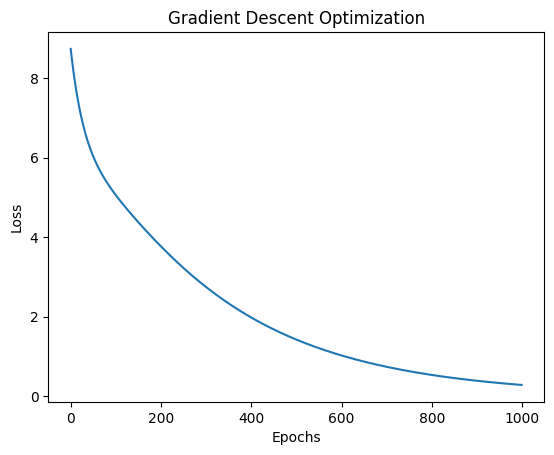

In [133]:
# Deep Learnign HW 1 - Gradient Descent
# Ahigad Genish ID -316228022
# Omer Sela ID - 316539535

# Initialize data:
train_labels = np.array([-1, 1, 1, -1])
train_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])


# Hyperparameters
learning_rate = 0.0005
epochs = 1000

# Parameters
w = np.random.normal(0, 1, (2, 1))
b2 = np.random.normal(0, 2, (1, 1))
u = np.random.normal(0,5, (2, 2))
b1 = np.random.normal(0, 3, (2, 1))

print("Initial parameters:")
print("Initial w", w)
print("Initial u", u)
print("Initial b1", b1)
print("Initial b2", b2)


# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Calculate f(x) = w.T * h + b2 where h = max(U.T * x + b1, 0)
def calculateFunc(xi):
    h = relu(np.dot(u.T, xi) + b1)
    y = np.dot(w.T, h) + b2
    return y

# Derivate Loss function by W
def dl_dw(predictions):

    sum = 0
    for i in range(len(train_data)):
        sum += -2 * (np.dot(relu(np.dot(u.T, train_data[i][:, np.newaxis]) + b1), (train_labels[i] - predictions[i]))) 
    return sum

# Derivate Loss function by U
def dl_du(predictions):

    sum = 0
    for i in range(len(train_data)):
        if(np.any(np.maximum(np.dot(u.T, train_data[i][:, np.newaxis]) + b1 , 0)) > 0):
             sum += -2 * np.dot(w,train_data[i][:, np.newaxis].T)* (train_labels[i] - predictions[i])
    return sum

# Derivate Loss function by b1
def dl_db1(predictions):

    sum = 0
    for i in range(len(train_data)):
        sum += -2 * w * (train_labels[i] - predictions[i])
    return sum

# Derivate Loss function by b2
def dl_db2(predictions):
    sum = 0
    for i in range(len(train_data)):
        sum += -2 * (train_labels[i] - predictions[i])
    return sum

# Calculate Loss function L(y, f(x)) = (y - f(x))^2
def lossFunc(predictions):
    predictions = np.array([calculateFunc(xi[:, np.newaxis]) for xi in train_data])
    squared_diff = np.square(train_labels - predictions.flatten())
    total_loss = np.sum(squared_diff)/len(train_data)
    return total_loss

# Train
# Gradient Descent training loop
losses = []

for epoch in range(epochs):

    # Forward pass
    predictions = np.array([calculateFunc(xi[:, np.newaxis]) for xi in train_data])

    # Compute the loss
    loss = lossFunc(predictions)
    losses.append(loss)

    
    # Backward pass (Gradient Descent)
    gradient_w = dl_dw(predictions)
    gradient_u = dl_du(predictions)
    gradient_b1 = dl_db1(predictions)
    gradient_b2 = dl_db2(predictions)


    # Update weights and biases
    w -= learning_rate * gradient_w
    u -= learning_rate * gradient_u
    b1 -= learning_rate * gradient_b1
    b2 -= learning_rate * gradient_b2

print("Final parameters: ")
print("W final: " , w)
print("U final: " , u)
print("b1 final: " ,b1)
print("b2 final: " , b2)
print("Loss final: " , loss)


# Plot the loss over epochs
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Gradient Descent Optimization')
plt.show()